<a href="https://colab.research.google.com/github/kilos11/Machine_Learning-Tensorflow-/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/100-days-of-machine-learning-main/day30-function-transformer/train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
# Selecting features (independent variables) for the dataset
# df.iloc[:, 1:3]: Selecting columns 1 and 2 (exclusive of 3) as features
X = df.iloc[:, 1:3]

# Selecting the target variable (dependent variable) for the dataset
# df.iloc[:, 0]: Selecting the first column as the target variable
y = df.iloc[:, 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-10-78e6ab3f55ad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


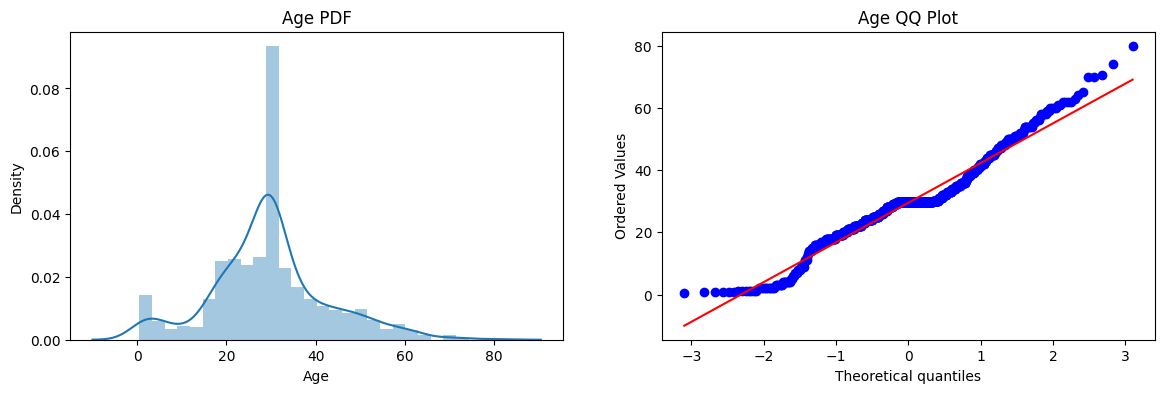

In [10]:
# Setting up a figure with a size of (14, 4) for subplots
plt.figure(figsize=(14, 4))

# Subplot 1 (Left):
# Creating a Probability Density Function (PDF) plot for the 'Age' column in the training set
# sns.distplot is a seaborn function for plotting univariate distributions
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')  # Adding a title to the subplot

# Subplot 2 (Right):
# Creating a Quantile-Quantile (QQ) plot for the 'Age' column in the training set
# stats.probplot is a function from scipy.stats for generating a probability plot against a specified theoretical distribution
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')  # Adding a title to the subplot

# Displaying the plots
plt.show()


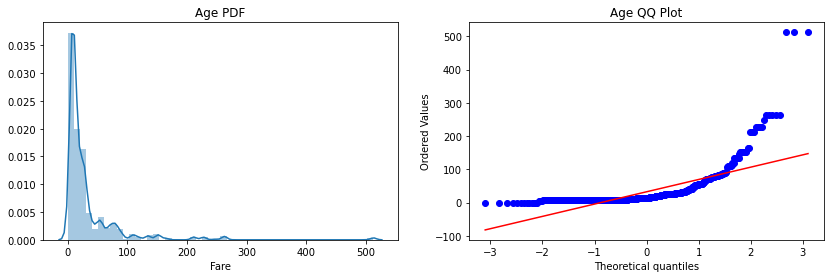

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [11]:
# Creating instances of machine learning classifiers

# Logistic Regression Classifier:
# clf is an instance of the LogisticRegression class from scikit-learn
# Logistic Regression is a linear model used for binary and multiclass classification
clf = LogisticRegression()

# Decision Tree Classifier:
# clf2 is an instance of the DecisionTreeClassifier class from scikit-learn
# Decision Trees are non-linear models that recursively split the data based on features to make predictions
clf2 = DecisionTreeClassifier()


In [13]:
# Training the classifiers using the training data

# Logistic Regression Classifier (clf):
# Fitting the logistic regression model to the training data (X_train, y_train)
clf.fit(X_train, y_train)

# Decision Tree Classifier (clf2):
# Fitting the decision tree model to the training data (X_train, y_train)
clf2.fit(X_train, y_train)

# Making predictions on the test data using the trained classifiers

# Logistic Regression Predictions:
# clf.predict() generates predictions for the test set (X_test)
y_pred = clf.predict(X_test)

# Decision Tree Predictions:
# clf2.predict() generates predictions for the test set (X_test)
y_pred1 = clf2.predict(X_test)

# Evaluating and printing the accuracy of the classifiers on the test data

# Logistic Regression Accuracy:
# Using accuracy_score to compare predicted labels (y_pred) with actual labels (y_test)
print("Accuracy LR", accuracy_score(y_test, y_pred))

# Decision Tree Accuracy:
# Using accuracy_score to compare predicted labels (y_pred1) with actual labels (y_test)
print("Accuracy DT", accuracy_score(y_test, y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


In [16]:
# Creating a FunctionTransformer instance from scikit-learn

# FunctionTransformer (trf):
#  Used to transform input data using a specified function
#  In this case, the transformation function is np.log1p, which computes the natural logarithm of (1 + input)
#  The transformation is useful for handling skewed or right-skewed data by stabilizing variance
trf = FunctionTransformer(func=np.log1p)


In [17]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [ ]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599875156054932


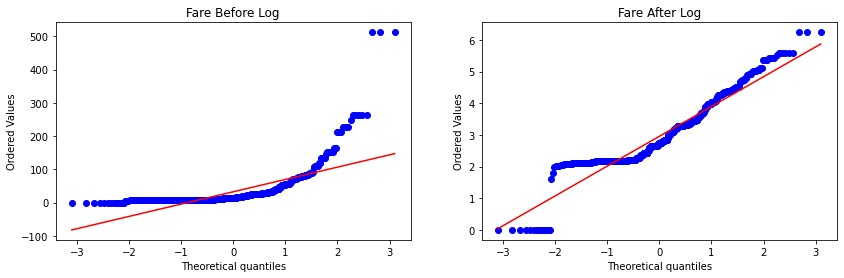

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

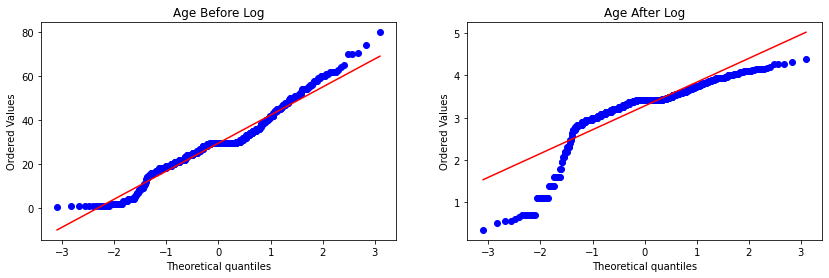

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [20]:
# Creating a ColumnTransformer with a specific transformation for a selected column

# ColumnTransformer (trf2):
# - Used to apply different transformers to different columns in a DataFrame
# - ('log', FunctionTransformer(np.log1p), ['Fare']): Applying the log transformation to the 'Fare' column
# - remainder='passthrough': Keeping the remaining columns unchanged
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

# Transforming the training set with the specified transformations

# X_train_transformed2:
# - Applying the transformations specified in trf2 to the training set (X_train)
# - The 'Fare' column is transformed using the log function, and the remaining columns are passed through unchanged
X_train_transformed2 = trf2.fit_transform(X_train)

# Transforming the test set with the specified transformations

# X_test_transformed2:
# - Applying the transformations specified in trf2 to the test set (X_test)
# - The 'Fare' column is transformed using the log function, and the remaining columns are passed through unchanged
X_test_transformed2 = trf2.transform(X_test)


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [ ]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599750312109862


In [21]:
# Defining a function to apply a specified transformation, train a classifier, and visualize the results

def apply_transform(transform):
    # Extracting features (X) and target variable (y) from the dataset
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    # Creating a ColumnTransformer with the specified transformation for the 'Fare' column
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    # Applying the transformations to the features (X) using the ColumnTransformer
    X_trans = trf.fit_transform(X)

    # Creating a Logistic Regression Classifier
    clf = LogisticRegression()

    # Evaluating the classifier's accuracy using cross-validation
    accuracy = np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10))
    print("Accuracy", accuracy)

    # Visualizing the distribution of 'Fare' before and after the transformation

    # Creating a figure with two subplots
    plt.figure(figsize=(14, 4))

    # Subplot 1 (Left): Probability plot for 'Fare' before the transformation
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    # Subplot 2 (Right): Probability plot for 'Fare' after the transformation
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    # Displaying the plots
    plt.show()


Accuracy 0.6195131086142323


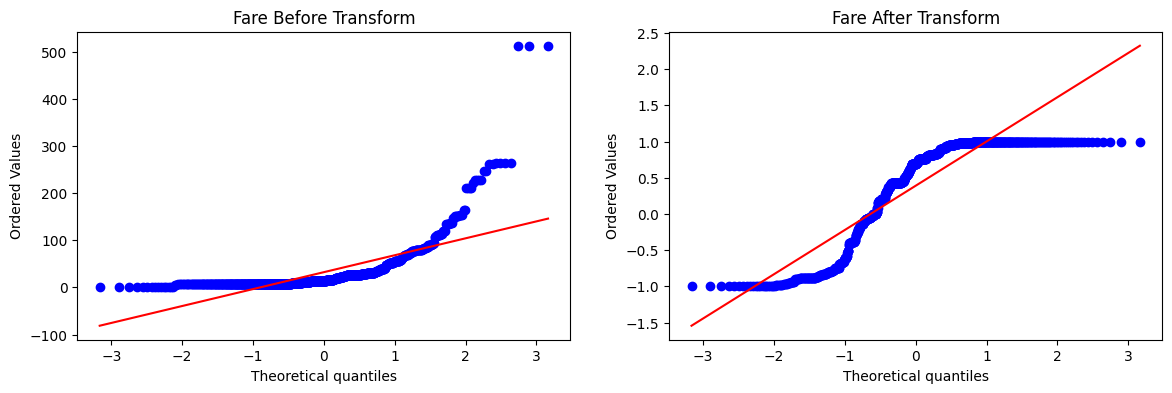

In [22]:
apply_transform(np.sin)